In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

2024-08-05 09:35:02.906570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 09:35:02.926814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 09:35:02.932919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 09:35:02.948573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 09:35:04.441870: W tensorflow/compiler/tf2

In [2]:
df_test = pd.read_csv("testCNN.csv")

In [3]:
df_train = pd.read_csv("trainCNN.csv")
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df_train.drop('label', axis=1)
y = df_train['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
X_train = X_train.values
X_test = X_test.values

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
)

datagen.fit(X_train)

'datagen = ImageDataGenerator(\n    rotation_range=15,\n    width_shift_range=0.1,\n    height_shift_range=0.1,\n    zoom_range=0.2,\n    shear_range=0.2,\n)\n\ndatagen.fit(X_train)'

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))

/home/jsles/.pyenv/versions/3.10.6/envs/simplon/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1722843311.396289  272882 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-05 09:35:11.435467: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model.add(BatchNormalization())

In [14]:
#Conv2D(32, (3, 3), activation='relu')

In [15]:
model.add(MaxPooling2D((2, 2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit((X_train, y_train, batch_size=32),
          epochs=19,
          validation_data=(X_test, y_test))
        
        #datagen.flow

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1051670034.py, line 5)

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,   
                    batch_size=32,       
                    steps_per_epoch=200,  
                    epochs=19,           
                    validation_data=(X_test, y_test))


Epoch 1/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6361 - loss: 1.1045 - val_accuracy: 0.8398 - val_loss: 0.5567
Epoch 2/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9150 - loss: 0.3001 - val_accuracy: 0.9187 - val_loss: 0.2826
Epoch 3/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9384 - loss: 0.2117 - val_accuracy: 0.9568 - val_loss: 0.1424
Epoch 4/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9563 - loss: 0.1520 - val_accuracy: 0.9595 - val_loss: 0.1335
Epoch 5/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9553 - loss: 0.1385 - val_accuracy: 0.9501 - val_loss: 0.1687
Epoch 6/19
 49/200 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9541 - loss: 0.1414

2024-08-05 09:36:54.362587: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/jsles/.pyenv/versions/3.10.6/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9477 - loss: 0.1242 - val_accuracy: 0.9561 - val_loss: 0.1505
Epoch 7/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9732 - loss: 0.0916 - val_accuracy: 0.9699 - val_loss: 0.1092
Epoch 8/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9680 - loss: 0.1057 - val_accuracy: 0.9705 - val_loss: 0.1007
Epoch 9/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9795 - loss: 0.0726 - val_accuracy: 0.9690 - val_loss: 0.1134
Epoch 10/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9771 - loss: 0.0787 - val_accuracy: 0.9704 - val_loss: 0.1064
Epoch 11/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9659 - loss: 0.1066 - val_accuracy: 0.9708 - val_loss: 0.1101
Epoch 12/19
 49/200 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9785 - loss: 0.0667

2024-08-05 09:37:50.180888: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9620 - loss: 0.0818 - val_accuracy: 0.9680 - val_loss: 0.1184
Epoch 13/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9773 - loss: 0.0809 - val_accuracy: 0.9714 - val_loss: 0.1060
Epoch 14/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9792 - loss: 0.0731 - val_accuracy: 0.9715 - val_loss: 0.0990
Epoch 15/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9819 - loss: 0.0471 - val_accuracy: 0.9738 - val_loss: 0.1013
Epoch 16/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9796 - loss: 0.0600 - val_accuracy: 0.9713 - val_loss: 0.1086
Epoch 17/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9776 - loss: 0.0729 - val_accuracy: 0.9725 - val_loss: 0.0972
Epoch 18/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9673 - loss: 0.0632 - val_accuracy: 0.9710 - val_loss: 0.1097
Epoch 19/19
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9880 - loss: 0.0332 - val_ac

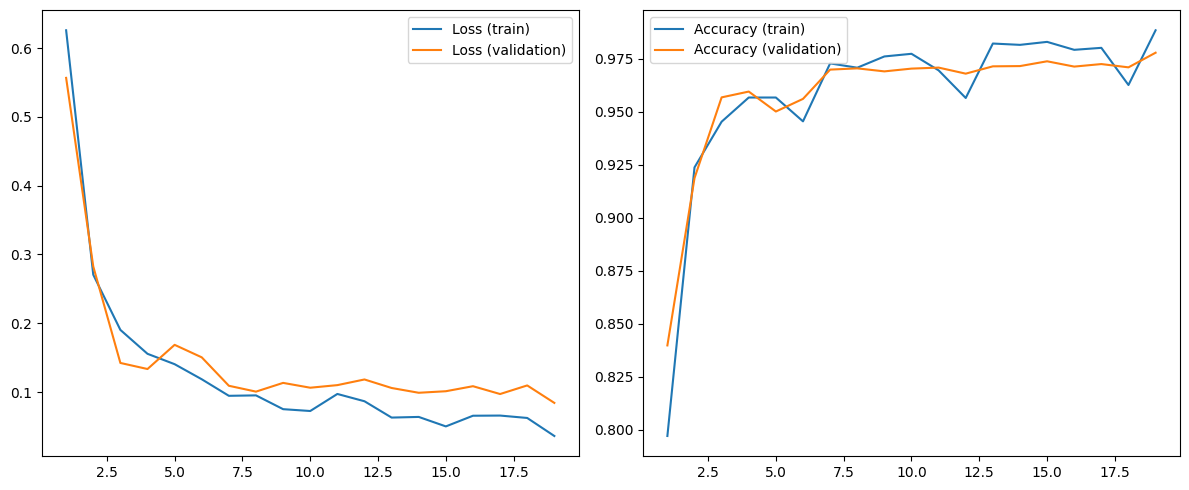

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict.get('val_loss', [])
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict.get('val_accuracy', [])
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Loss (train)')
plt.plot(epochs, val_loss_values, label='Loss (validation)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, label='Accuracy (train)')
plt.plot(epochs, val_accuracy_values, label='Accuracy (validation)')
plt.legend()

plt.tight_layout()
plt.show()